In [1]:
import torch
spectrum_amplitude = torch.load("./enstrohpy_spectrum_amplitude.pt")[None,...]/5 # 1*1*128*128

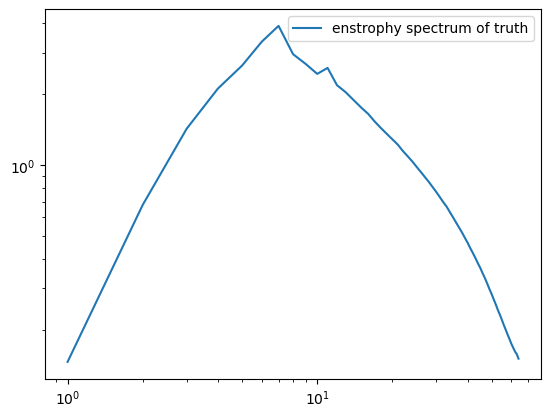

In [5]:
import scipy.stats as stats
import numpy as np
from matplotlib import pyplot as plt

npix = spectrum_amplitude.shape[-1]
kfreq = np.fft.fftfreq(npix) * npix
kfreq2D = np.meshgrid(kfreq, kfreq)
knrm = np.sqrt(kfreq2D[0]**2 + kfreq2D[1]**2)
knrm = knrm.flatten()
fourier_amplitudes = spectrum_amplitude.flatten()

kbins = np.arange(0.5, npix//2+1, 1.)
kvals = 0.5 * (kbins[1:] + kbins[:-1])
Abins_w, _, _ = stats.binned_statistic(knrm, fourier_amplitudes,
                                 statistic = "mean",
                                 bins = kbins)
Abins_w *= np.pi * (kbins[1:]**2 - kbins[:-1]**2)


plt.plot(kvals, Abins_w, label = 'enstrophy spectrum of truth')
plt.xscale('log')
plt.yscale('log')
plt.legend()

In [18]:
new_spectrum = spectrum_amplitude * (np.sqrt(np.sqrt(kfreq2D[0]**2 + kfreq2D[1]**2)))

/state/partition1/job-57619913/ipykernel_3332588/2694879391.py:1: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  new_spectrum = spectrum_amplitude * (np.sqrt(np.sqrt(kfreq2D[0]**2 + kfreq2D[1]**2)))


In [19]:
kbins = np.arange(0.5, npix//2+1, 1.)
kvals = 0.5 * (kbins[1:] + kbins[:-1])
Abins_w_new, _, _ = stats.binned_statistic(knrm, new_spectrum.flatten(),
                                 statistic = "mean",
                                 bins = kbins)
Abins_w_new *= np.pi * (kbins[1:]**2 - kbins[:-1]**2)

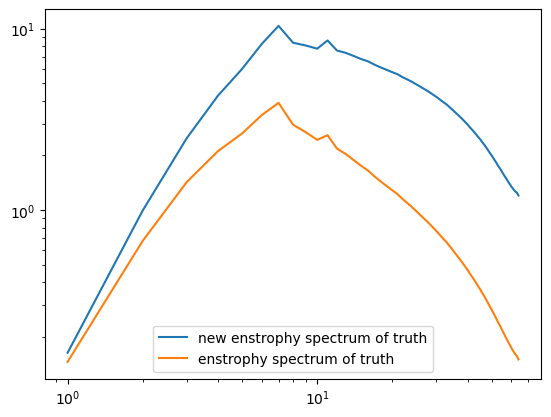

In [20]:

plt.plot(kvals, Abins_w_new, label = 'new enstrophy spectrum of truth')
plt.plot(kvals, Abins_w, label = 'enstrophy spectrum of truth')
plt.xscale('log')
plt.yscale('log')
plt.legend()